In [1]:
import numpy as np

In [2]:
#objective function f(x)
def f(x,y):
    return x**2 - x*y + y**2

#gradient function df(x)
def grad_f_x(x,y):
    return 2*x-y
 
def grad_f_y(x,y):
    return -x+2*y

## Solve function will find optimal points and value of function at that point
def solve(start_points, alpha, tolerance, iter ):
    x,y=start_points
    path = [(x, y)]
    for i in range(iter):
        x_new=x-alpha*grad_f_x(x,y)
        y_new=y-alpha*grad_f_y(x,y)

        # Calculate Euclidean distance
        distance = np.linalg.norm([x_new - x, y_new - y])
        if(distance<tolerance):
            break

        x=x_new
        y=y_new
        path.append((x, y))

    return x,y,f(x,y), path



In [3]:
start_points= (1,1)
alpha=0.1
tolerance=1e-6
iter=1000

x,y,fx_y,path=solve(start_points, alpha, tolerance, iter)

print("Optimal Points (x,y)=",x,y)
print("Value of F(x,y)     =",fx_y)

Optimal Points (x,y)= 6.751551218497447e-06 6.751551218497447e-06
Value of F(x,y)     = 4.558344385599436e-11


In [4]:
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

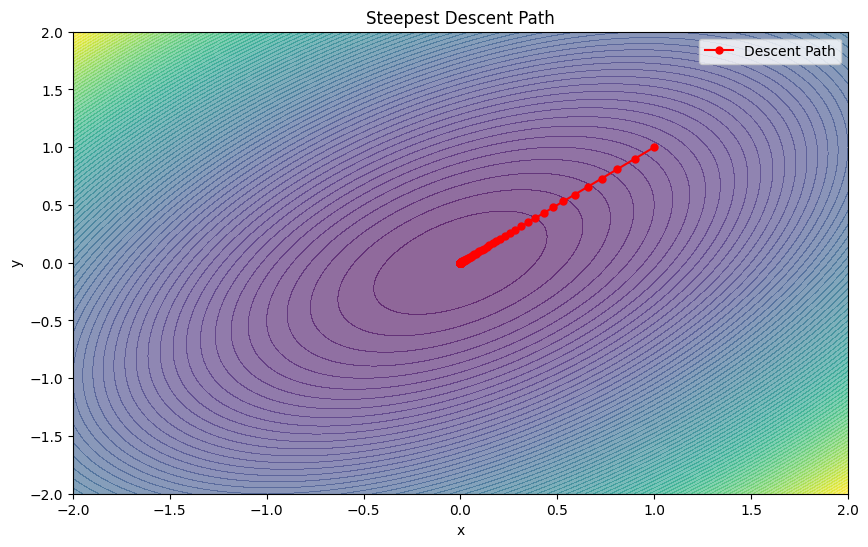

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, Z, levels=100, alpha=0.6)

t_x = [point[0] for point in path]
t_y = [point[1] for point in path]

plt.plot(t_x, t_y, 'r-o', markersize=5, label='Descent Path')

plt.title("Steepest Descent Path")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()